# 8.3 Exercises

## Exercise 1: The Dataset

Since this chapter didn’t introduce many new concepts, we will also take some time to review and practice skills you've learned in previous chapters.

Today’s dataset includes various variables related to student stress factors and mental health. It is included in the teaching materials, so you can either load it directly from your files, or by providing the URL:

- `pd.read_csv("data/StressLevelDataset.csv", delimiter='\t')`
- `pd.read_csv("https://raw.githubusercontent.com/mibur1/psy111/main/book/statistics/4_Moderated_Reg/data/StressLevelDataset.csv", delimiter='\t')`

Your research question will be: **Does social support moderate the effect of anxiety on self-esteem?**

1. Load and explore the dataset.
2. Select only the variables relevant to your research question (subset the dataset), and save it to a new DataFrame. Make sure to create a deep copy by using `.copy()`
3. Create a correlation matrix for the three variables of interest (anxiety, social support, and self-esteem).

   anxiety_level  self_esteem  social_support
0             14           20               2
1             15            8               1
2             12           18               2
3             16           12               1
4             16           28               1
       anxiety_level  self_esteem  social_support
count    1100.000000  1100.000000     1100.000000
mean       11.063636    17.777273        1.881818
std         6.117558     8.944599        1.047826
min         0.000000     0.000000        0.000000
25%         6.000000    11.000000        1.000000
50%        11.000000    19.000000        2.000000
75%        16.000000    26.000000        3.000000
max        21.000000    30.000000        3.000000
                anxiety_level  self_esteem  social_support
anxiety_level        1.000000    -0.672745       -0.569748
self_esteem         -0.672745     1.000000        0.679211
social_support      -0.569748     0.679211        1.000000


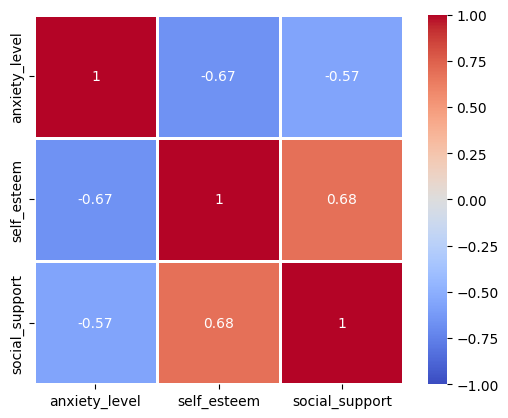

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/mibur1/psy111/main/book/statistics/4_Moderated_Reg/data/StressLevelDataset.csv", delimiter=',')

df_small = df[['anxiety_level', 'self_esteem', 'social_support']].copy() # Create a deep copy

print(df_small.head())
print(df_small.describe())

corr_matrix = df_small.corr()
corr_matrix_rounded = corr_matrix.round(2)
print(corr_matrix)

sns.heatmap(corr_matrix_rounded,
            annot=True,      # Display correlation values inside the heatmap cells.
            vmin=-1, vmax=1, # Define the limits of the color scale
            square=True,     # Make sure cells stay square
            cmap="coolwarm", # Set the color map
            linewidths=1     # Lines between the cells
            )
plt.show()

# TODO

## Exercise 2
1. Center the variables anxiety_level and self_esteem by subtracting their mean values. Save the centered variables to new columns in your DataFrame.
2. Perform a moderated regression modelling the main effects of, as well as interaction effects between, `anxiety_centered` and `social_support` on `self_esteem_centered`.
3. Take some time to interpret the outputs (similar to as shown in the previous section).

*Warning: `social_support` is NOT a continuous variable. You can, for example, use dummy coding for your model.*

In [12]:
import statsmodels.formula.api as smf

# TODO
df_small['anxiety_centered'] = df_small['anxiety_level'] - df_small['anxiety_level'].mean()
df_small['self_esteem_centered'] = df_small['self_esteem'] - df_small['self_esteem'].mean()



print(df_small.head())

import statsmodels.formula.api as smf
results = smf.ols(formula='self_esteem_centered ~ anxiety_centered + social_support', data=df_small).fit()
print(results.summary())


   anxiety_level  self_esteem  social_support  anxiety_centered  \
0             14           20               2          2.936364   
1             15            8               1          3.936364   
2             12           18               2          0.936364   
3             16           12               1          4.936364   
4             16           28               1          4.936364   

   self_esteem_centered  
0              2.222727  
1             -9.777273  
2              0.222727  
3             -5.777273  
4             10.222727  
                             OLS Regression Results                             
Dep. Variable:     self_esteem_centered   R-squared:                       0.582
Model:                              OLS   Adj. R-squared:                  0.581
Method:                   Least Squares   F-statistic:                     764.5
Date:                  Wed, 18 Dec 2024   Prob (F-statistic):          1.20e-208
Time:                          12:43

Interpretations:


## Exercise 3: Quiz

Please answer the following questions:

In [ ]:
from jupyterquiz import display_quiz

display_quiz('https://raw.githubusercontent.com/mibur1/psy111/main/book/solutions/quiz/question1.json')
display_quiz('https://raw.githubusercontent.com/mibur1/psy111/main/book/solutions/quiz/question2.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Voluntary exercise

Create a scatterplot to visualize the relationship between `anxiety` and `self_esteem`. Adding a linear regression line. Use `social_support` as the hue to differentiate groups.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# TODO